In [ ]:
#Showing some info on the VM used (e.g., CPU model, RAM capacity)
print('*******CPU Info***********')
!lscpu
print('*******RAM Info***********')
!free -g

## **Part 1: Installing Spark**

In [2]:
#Updating system packages (generally recommended)
!sudo apt-get update

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Ign:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packa

In [3]:
#Installing Java development kit (JDK)
#To run Spark, we need Java Runtime Environment (JRE)
#JDK also includes JRE.
!sudo apt install default-jdk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  default-jdk-headless openjdk-11-jdk
Suggested packages:
  openjdk-11-demo openjdk-11-source visualvm
The following NEW packages will be installed:
  default-jdk default-jdk-headless openjdk-11-jdk
0 upgraded, 3 newly installed, 0 to remove and 76 not upgraded.
Need to get 1,556 kB of archives.
After this operation, 1,614 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 default-jdk-headless amd64 2:1.11-68ubuntu1~18.04.1 [1,132 B]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 openjdk-11-jdk amd64 11.0.15+10-0ubuntu0.18.04.1 [1,554 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 default-jdk amd64 2:1.11-68

In [4]:
#Showing Java version
!java -version

openjdk version "11.0.15" 2022-04-19
OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1)
OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)


In [5]:
#Downloading Apache Spark files
#Please note the Spark version (3.0 upwards) 
!wget https://archive.apache.org/dist/spark/spark-3.0.3/spark-3.0.3-bin-hadoop2.7.tgz

#Extracting files
!tar xvf spark-3.0.3-bin-hadoop2.7.tgz

--2022-08-03 04:08:42--  https://archive.apache.org/dist/spark/spark-3.0.3/spark-3.0.3-bin-hadoop2.7.tgz
Resolving archive.apache.org (archive.apache.org)... 138.201.131.134, 2a01:4f8:172:2ec5::2
Connecting to archive.apache.org (archive.apache.org)|138.201.131.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 220400553 (210M) [application/x-gzip]
Saving to: ‘spark-3.0.3-bin-hadoop2.7.tgz’

spark-3.0.3-bin-had 100%[===================>] 210.19M  25.1MB/s    in 13s     

2022-08-03 04:08:55 (16.2 MB/s) - ‘spark-3.0.3-bin-hadoop2.7.tgz’ saved [220400553/220400553]

spark-3.0.3-bin-hadoop2.7/
spark-3.0.3-bin-hadoop2.7/NOTICE
spark-3.0.3-bin-hadoop2.7/kubernetes/
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/worker_memory_check.py
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/py_container_checks.py
spark-3.0.3-bin-hadoop2.7/kubernetes/tests/pyfiles.py
spark-3.0.3-bin-hadoop2.7/kubernetes/dockerfiles/
spark-3.0.3-bin-hadoop2.

In [6]:
#Showing list of files in te current directory
!ls

sample_data  spark-3.0.3-bin-hadoop2.7	spark-3.0.3-bin-hadoop2.7.tgz


In [7]:
#Installing findspark and pyspark --
#findspark makes pyspark importable as a regular library
!pip install findspark
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 33 kB/s 
     |████████████████████████████████| 199 kB 48.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=affb3df89b49bb434293081875521b3267781f8f9ddc095ef7d61e29a22e4458
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [8]:
#Setting the environment path
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.3-bin-hadoop2.7"


In [9]:
#Running a local SparkSession
import findspark
findspark.init()
from pyspark.sql import SparkSession

#Creating a SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [10]:
#Pyspark shell
!pyspark

Python 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0] on linux
Type "help", "copyright", "credits" or "license" for more information.
22/08/03 04:10:13 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/08/03 04:10:17 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 3.0.3
      /_/

Using Python version 3.7.13 (default, Apr 24 2022 01:04:09)
SparkSession available as 'spark'.
>>> quit()


## **Exploatory Data Analysis for Road Accidents**

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
df_road = spark.read.csv('/content/drive/MyDrive/UKAccidentData_cleaned_Data.csv', inferSchema=True, header=True)
print("Dataframe Shape: ", (df_road.count(), len(df_road.columns)))

Dataframe Shape:  (567149, 27)


In [13]:
df_road.show(5)

+--------------+---------+---------+-------------------+-----------------+------------------+--------------------+----------+-----------+-----+--------------------------+-------------------------+--------------+---------------+------------------+-----------+--------------+---------------+---------------------------------+---------------------------------------+--------------------+--------------------+-----------------------+--------------------------+-------------------+-------------------+-------------------------------------------+
|Accident_Index|Longitude| Latitude|       Police_Force|Accident_Severity|Number_of_Vehicles|Number_of_Casualties|      Date|Day_of_Week| Time|Local_Authority_(District)|Local_Authority_(Highway)|1st_Road_Class|1st_Road_Number|         Road_Type|Speed_limit|2nd_Road_Class|2nd_Road_Number|Pedestrian_Crossing-Human_Control|Pedestrian_Crossing-Physical_Facilities|    Light_Conditions|  Weather_Conditions|Road_Surface_Conditions|Special_Conditions_at_Site|Car

In [14]:
#getting column names
df_road.columns

['Accident_Index',
 'Longitude',
 'Latitude',
 'Police_Force',
 'Accident_Severity',
 'Number_of_Vehicles',
 'Number_of_Casualties',
 'Date',
 'Day_of_Week',
 'Time',
 'Local_Authority_(District)',
 'Local_Authority_(Highway)',
 '1st_Road_Class',
 '1st_Road_Number',
 'Road_Type',
 'Speed_limit',
 '2nd_Road_Class',
 '2nd_Road_Number',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Light_Conditions',
 'Weather_Conditions',
 'Road_Surface_Conditions',
 'Special_Conditions_at_Site',
 'Carriageway_Hazards',
 'Urban_or_Rural_Area',
 'Did_Police_Officer_Attend_Scene_of_Accident']

In [15]:
#getting structure of the data frame
df_road.printSchema()

root
 |-- Accident_Index: string (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Police_Force: string (nullable = true)
 |-- Accident_Severity: string (nullable = true)
 |-- Number_of_Vehicles: integer (nullable = true)
 |-- Number_of_Casualties: integer (nullable = true)
 |-- Date: string (nullable = true)
 |-- Day_of_Week: string (nullable = true)
 |-- Time: string (nullable = true)
 |-- Local_Authority_(District): integer (nullable = true)
 |-- Local_Authority_(Highway): string (nullable = true)
 |-- 1st_Road_Class: integer (nullable = true)
 |-- 1st_Road_Number: integer (nullable = true)
 |-- Road_Type: string (nullable = true)
 |-- Speed_limit: integer (nullable = true)
 |-- 2nd_Road_Class: integer (nullable = true)
 |-- 2nd_Road_Number: integer (nullable = true)
 |-- Pedestrian_Crossing-Human_Control: string (nullable = true)
 |-- Pedestrian_Crossing-Physical_Facilities: string (nullable = true)
 |-- Light_Conditions: string

In [16]:
#Finding the count of missing values in each column
from pyspark.sql.functions import when, count, col, isnan
df_road.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_road.columns]).show()

+--------------+---------+--------+------------+-----------------+------------------+--------------------+----+-----------+----+--------------------------+-------------------------+--------------+---------------+---------+-----------+--------------+---------------+---------------------------------+---------------------------------------+----------------+------------------+-----------------------+--------------------------+-------------------+-------------------+-------------------------------------------+
|Accident_Index|Longitude|Latitude|Police_Force|Accident_Severity|Number_of_Vehicles|Number_of_Casualties|Date|Day_of_Week|Time|Local_Authority_(District)|Local_Authority_(Highway)|1st_Road_Class|1st_Road_Number|Road_Type|Speed_limit|2nd_Road_Class|2nd_Road_Number|Pedestrian_Crossing-Human_Control|Pedestrian_Crossing-Physical_Facilities|Light_Conditions|Weather_Conditions|Road_Surface_Conditions|Special_Conditions_at_Site|Carriageway_Hazards|Urban_or_Rural_Area|Did_Police_Officer_Atte

In [17]:
#getting basic statistics related to the speed limit column
df_road.describe('Speed_limit').show()

+-------+------------------+
|summary|       Speed_limit|
+-------+------------------+
|  count|            567149|
|   mean| 39.80316460048417|
| stddev|14.479930181473815|
|    min|                10|
|    max|                70|
+-------+------------------+



In [ ]:
# df_road.groupBy("Road_Surface_Conditions").select("Speed_limit")
#getting counts related to the road surface conditions 
df_road.groupBy("Road_Surface_Conditions").count().orderBy("Road_Surface_Conditions").show()

+-----------------------+------+
|Road_Surface_Conditions| count|
+-----------------------+------+
|                    Dry|388265|
|   Flood (Over 3cm o...|   749|
|              Frost/Ice|  7875|
|                   Snow|  2089|
|               Wet/Damp|168171|
+-----------------------+------+



In [ ]:
#Selection and summary of all numeric variables

num_cols = [col[0] for col in df_road.dtypes if col[1] != 'string']
num_cols

['Location_Easting_OSGR',
 'Location_Northing_OSGR',
 'Longitude',
 'Latitude',
 'Accident_Severity',
 'Number_of_Vehicles',
 'Number_of_Casualties',
 'Local_Authority_(District)',
 '1st_Road_Class',
 '1st_Road_Number',
 'Speed_limit',
 '2nd_Road_Class',
 '2nd_Road_Number',
 'Urban_or_Rural_Area']

In [ ]:
#getting average speed related to the road surface condition
df_road.groupBy("Road_Surface_Conditions").agg({"Speed_limit": "mean"}).show() 

+-----------------------+------------------+
|Road_Surface_Conditions|  avg(Speed_limit)|
+-----------------------+------------------+
|   Flood (Over 3cm o...| 54.09879839786382|
|              Frost/Ice|45.747301587301585|
|               Wet/Damp| 42.05936219681158|
|                    Dry|38.644224949454625|
|                   Snow|  46.0411680229775|
+-----------------------+------------------+



It seems that when road surface condition is in flood average speed is 54.1 miles per hour

In [18]:
#importing necessary libraries matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns


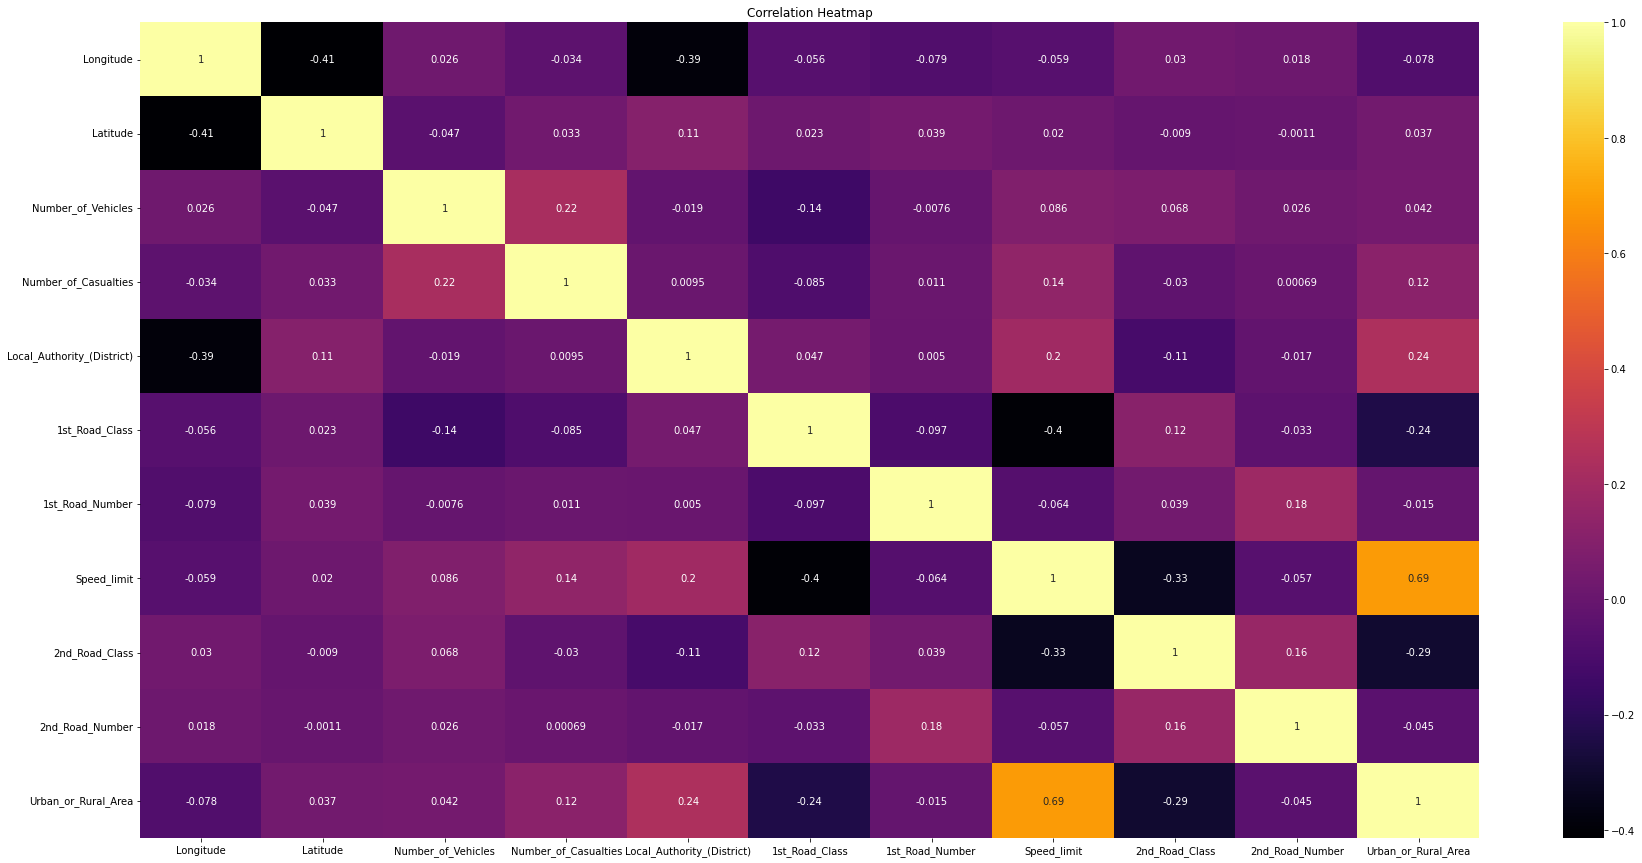

In [19]:
#Plot 1: Correlation Heatmap

#converting in to pandas data frame
plt.figure(figsize=(30,15))
corrMatrix= df_road.toPandas().corr(method='pearson') 

#Plotting heatmap
heatmap = sns.heatmap(corrMatrix,  annot=True, cmap='inferno')
heatmap.set_title('Correlation Heatmap')
plt.show()

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

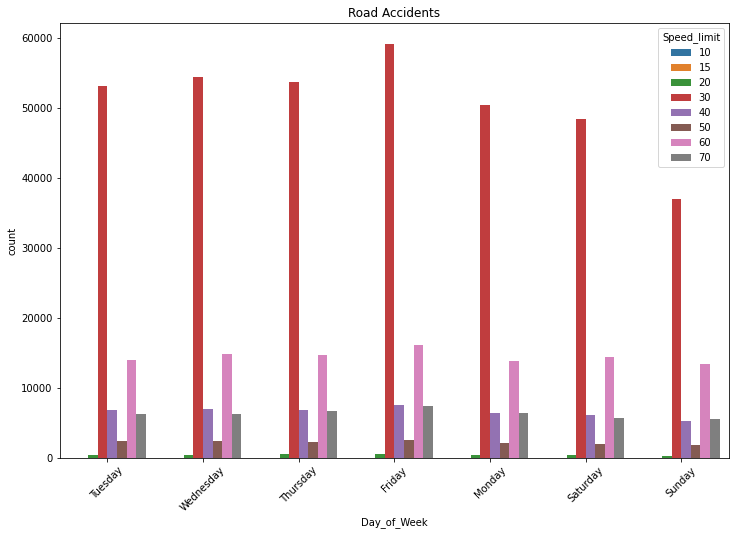

In [20]:
#Plotting no of accidents related to day of week and speed limit
df_pandas=df_road.toPandas()
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(x="Day_of_Week", hue="Speed_limit", data=df_pandas, ax=ax).set(title='Road Accidents')

plt.xticks(rotation=45)

According to the above graph, it shows that number of accidents on friday have higher count than other days. Further it seems that the most of the people normally drive at 30 miles per hour speed limit.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

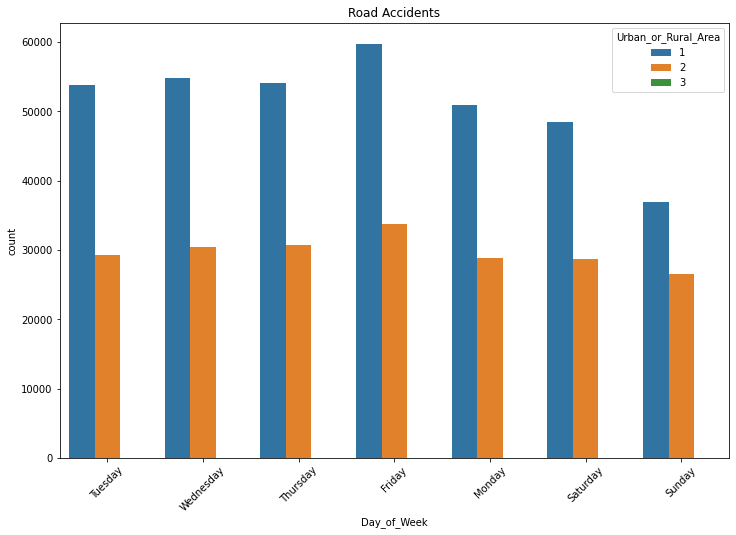

In [ ]:
#PPlotting no of accidents related to day of week and nature of area.(Urban/Rural)
df_pandas=df_road.toPandas()
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(x="Day_of_Week", hue="Urban_or_Rural_Area", data=df_pandas, ax=ax).set(title='Road Accidents')
plt.xticks(rotation=45)

In [ ]:
df_road.columns

['Accident_Index',
 'Longitude',
 'Latitude',
 'Police_Force',
 'Accident_Severity',
 'Number_of_Vehicles',
 'Number_of_Casualties',
 'Date',
 'Day_of_Week',
 'Time',
 'Local_Authority_(District)',
 'Local_Authority_(Highway)',
 '1st_Road_Class',
 '1st_Road_Number',
 'Road_Type',
 'Speed_limit',
 '2nd_Road_Class',
 '2nd_Road_Number',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Light_Conditions',
 'Weather_Conditions',
 'Road_Surface_Conditions',
 'Special_Conditions_at_Site',
 'Carriageway_Hazards',
 'Urban_or_Rural_Area',
 'Did_Police_Officer_Attend_Scene_of_Accident']

Above graph shows that the most accidents happened in friday and most of them happend in urban areas.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

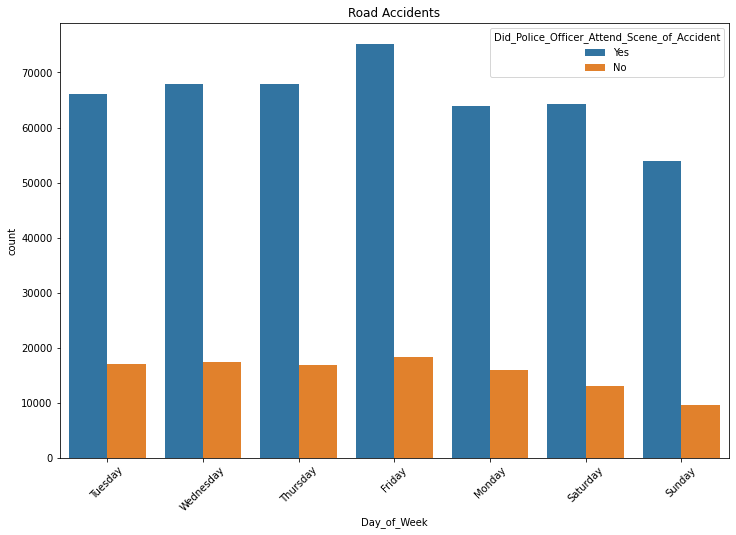

In [ ]:
df_pandas=df_road.toPandas()
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(x="Day_of_Week", hue="Did_Police_Officer_Attend_Scene_of_Accident", data=df_pandas, ax=ax).set(title='Road Accidents')
plt.xticks(rotation=45)

In [ ]:
df_road.columns

['Accident_Index',
 'Longitude',
 'Latitude',
 'Police_Force',
 'Accident_Severity',
 'Number_of_Vehicles',
 'Number_of_Casualties',
 'Date',
 'Day_of_Week',
 'Time',
 'Local_Authority_(District)',
 'Local_Authority_(Highway)',
 '1st_Road_Class',
 '1st_Road_Number',
 'Road_Type',
 'Speed_limit',
 '2nd_Road_Class',
 '2nd_Road_Number',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Light_Conditions',
 'Weather_Conditions',
 'Road_Surface_Conditions',
 'Special_Conditions_at_Site',
 'Carriageway_Hazards',
 'Urban_or_Rural_Area',
 'Did_Police_Officer_Attend_Scene_of_Accident']

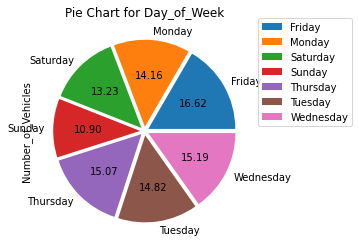

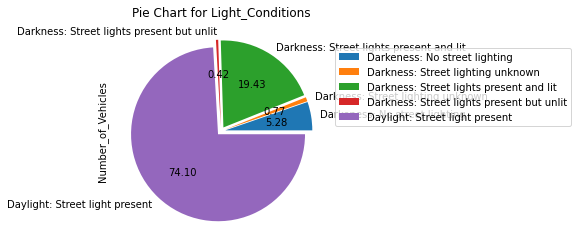

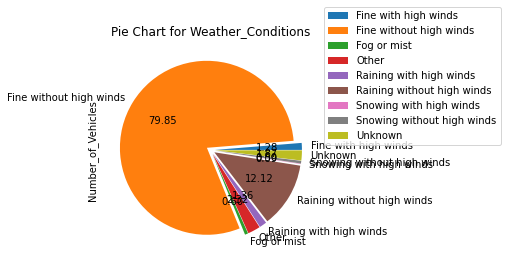

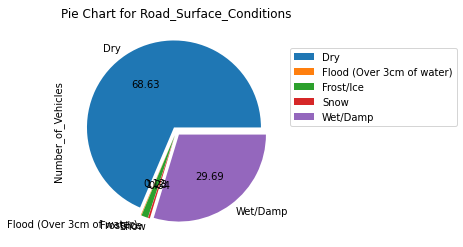

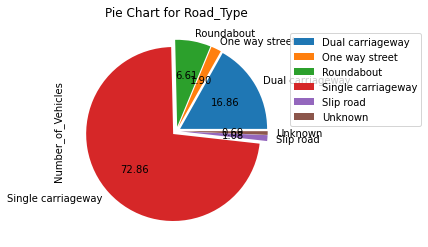

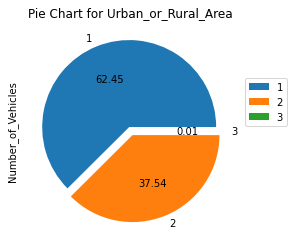

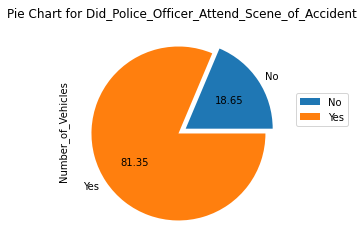

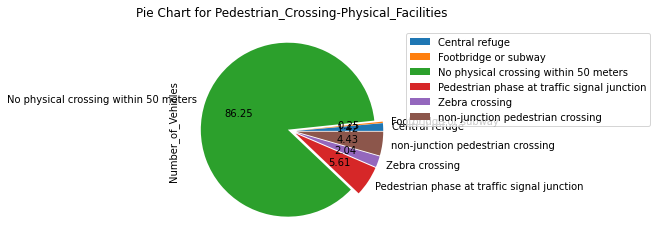

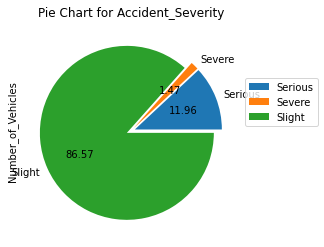

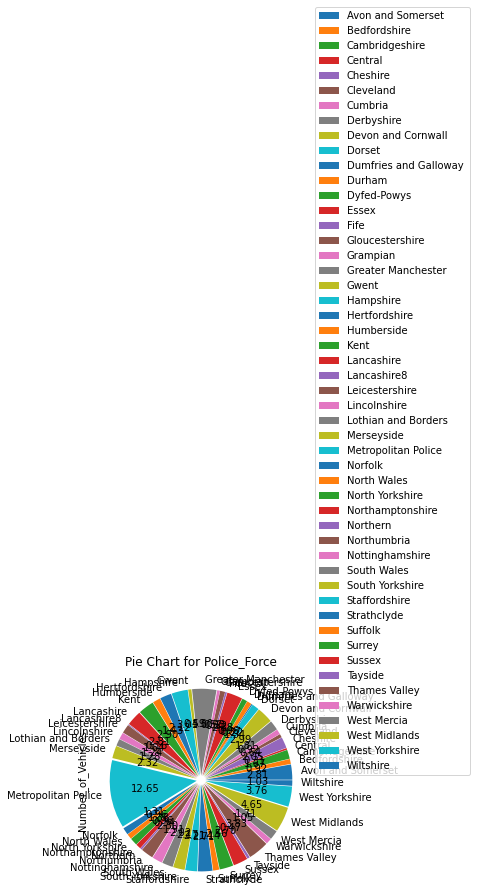

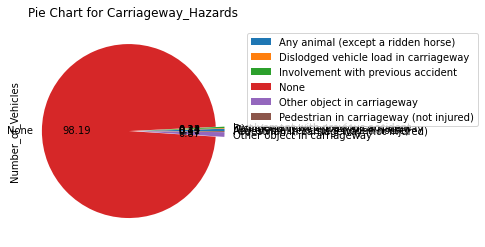

In [ ]:
#Finding percentages of number of vehicle accidents happend related to week day
Input=["Day_of_Week","Light_Conditions","Weather_Conditions","Road_Surface_Conditions",
       "Road_Type","Urban_or_Rural_Area","Did_Police_Officer_Attend_Scene_of_Accident",
       "Pedestrian_Crossing-Physical_Facilities","Accident_Severity","Police_Force","Carriageway_Hazards"]
for input in  Input:
  title="Pie Chart for " + input
  count=len(df_pandas[input].unique())
  df_pandas.groupby([input]).sum().plot(
      kind='pie', y="Number_of_Vehicles", autopct='%.2f', explode=[0.05]*count
      ).set(title=title)
  plt.legend(loc='lower left', bbox_to_anchor=(1, 0.5))
  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text major ticklabel objects>)

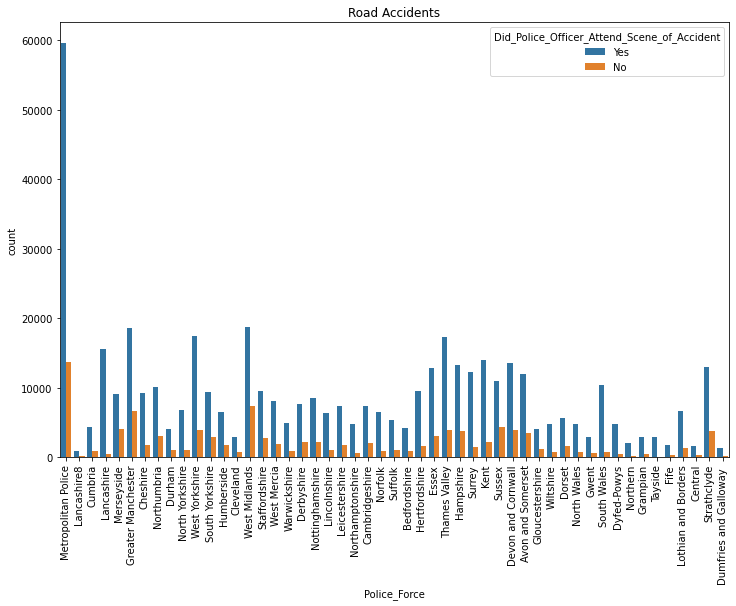

In [ ]:
# plt.barplot(df_pandas["Police_Force"])
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(x="Police_Force", hue="Did_Police_Officer_Attend_Scene_of_Accident", data=df_pandas, ax=ax).set(title='Road Accidents')
plt.xticks(rotation=90)

According to the pie chart, it also shows that there are more number of vehicle accidents happend in saturday than other days.

In [ ]:
df_pandas.columns
# for i in range(5):
#   print(i)
# len(df_pandas["Day_of_Week"].unique())
l=[7]*5
df_pandas.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident'],
      dtype='object')

(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 <a list of 7 Text major ticklabel objects>)

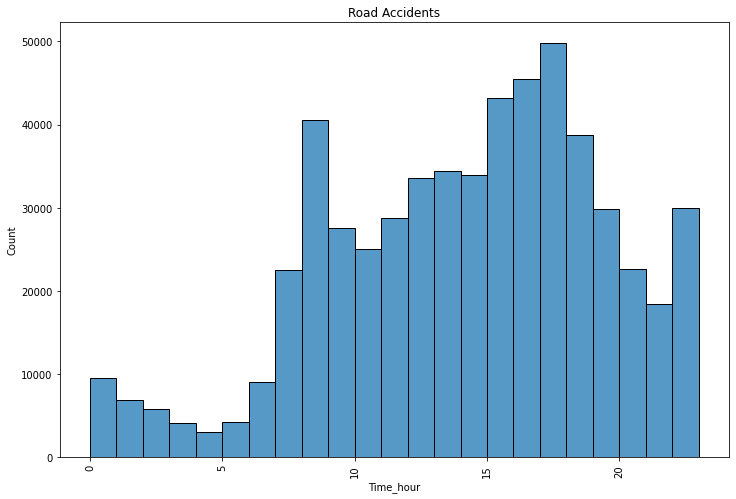

In [ ]:
import pandas as pd
df_time=df_pandas
df_time["time_string"]=df_time["Time"].astype(str)
df_time["Time_hour"]=df_time["time_string"].str.slice(0,2,1)
df_time = df_time.astype({'Time_hour':'int'})
df_time = df_time.sort_values('Time_hour')
fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(df_time["Time_hour"],binwidth=1).set(title='Road Accidents')
# sns.barplot(x="Time_hour",y="Number_of_Vehicles",data=df_time)
plt.xticks(rotation=90)


In [ ]:
# df_pandas["Accident_Severity"]=df_pandas["Heart_Disease"]
df_pandas["Accident_Severity"].replace(1,"Fatal",inplace=True)
df_pandas["Accident_Severity"].replace(2,"Serious",inplace=True)
df_pandas["Accident_Severity"].replace(3,"Slight",inplace=True)
df_pandas["Accident_Severity"].value_counts()

Slight     484523
Serious     74086
vndbvn       8540
Name: Accident_Severity, dtype: int64

In [ ]:
df_road.columns

['Accident_Index',
 'Longitude',
 'Latitude',
 'Police_Force',
 'Accident_Severity',
 'Number_of_Vehicles',
 'Number_of_Casualties',
 'Date',
 'Day_of_Week',
 'Time',
 'Local_Authority_(District)',
 'Local_Authority_(Highway)',
 '1st_Road_Class',
 '1st_Road_Number',
 'Road_Type',
 'Speed_limit',
 '2nd_Road_Class',
 '2nd_Road_Number',
 'Pedestrian_Crossing-Human_Control',
 'Pedestrian_Crossing-Physical_Facilities',
 'Light_Conditions',
 'Weather_Conditions',
 'Road_Surface_Conditions',
 'Special_Conditions_at_Site',
 'Carriageway_Hazards',
 'Urban_or_Rural_Area',
 'Did_Police_Officer_Attend_Scene_of_Accident']

According to the graph, it shows that number of accidents have been increased after 10.00 a.m and again decreased after 5.00 p.m. The highest number of road accidents happend within the time range between 5.00 p.m and 6.00 p.m. 

## **Running SQL-like Queries**

In [ ]:
#@title Default title text
#Query1: select all columns  
df_road.select('*').orderBy("Number_of_Casualties", ascending = False).show()

+--------------+---------+---------+-------------------+-----------------+------------------+--------------------+----------+-----------+-----+--------------------------+-------------------------+--------------+---------------+------------------+-----------+--------------+---------------+---------------------------------+---------------------------------------+--------------------+--------------------+-----------------------+--------------------------+-------------------+-------------------+-------------------------------------------+
|Accident_Index|Longitude| Latitude|       Police_Force|Accident_Severity|Number_of_Vehicles|Number_of_Casualties|      Date|Day_of_Week| Time|Local_Authority_(District)|Local_Authority_(Highway)|1st_Road_Class|1st_Road_Number|         Road_Type|Speed_limit|2nd_Road_Class|2nd_Road_Number|Pedestrian_Crossing-Human_Control|Pedestrian_Crossing-Physical_Facilities|    Light_Conditions|  Weather_Conditions|Road_Surface_Conditions|Special_Conditions_at_Site|Car

In [ ]:
df_road.select('Police_Force', 'Number_of_Casualties',"Accident_Severity","Date").show()

+-------------------+--------------------+-----------------+----------+
|       Police_Force|Number_of_Casualties|Accident_Severity|      Date|
+-------------------+--------------------+-----------------+----------+
|Metropolitan Police|                   1|          Serious|04/01/2005|
|Metropolitan Police|                   1|           Slight|05/01/2005|
|Metropolitan Police|                   1|           Slight|06/01/2005|
|Metropolitan Police|                   1|           Slight|07/01/2005|
|Metropolitan Police|                   1|           Slight|10/01/2005|
|Metropolitan Police|                   1|           Slight|11/01/2005|
|Metropolitan Police|                   1|           Slight|13/01/2005|
|Metropolitan Police|                   2|           Slight|14/01/2005|
|Metropolitan Police|                   2|           Slight|15/01/2005|
|Metropolitan Police|                   5|           Slight|15/01/2005|
|Metropolitan Police|                   1|           Slight|16/0

In [ ]:
#Query 3: Select all customers from France and tenure >3, in descending order by age 
df_road.select('Police_Force', 'Number_of_Casualties','Accident_Severity','Date').orderBy('Number_of_Casualties', ascending = False).show()

+-------------------+--------------------+-----------------+----------+
|       Police_Force|Number_of_Casualties|Accident_Severity|      Date|
+-------------------+--------------------+-----------------+----------+
|      Thames Valley|                  68|                1|03/01/2007|
|     West Yorkshire|                  45|                1|25/09/2006|
|      Hertfordshire|                  42|                1|11/10/2007|
|              Gwent|                  41|                3|19/07/2006|
|Metropolitan Police|                  40|                3|19/02/2007|
|        Dyfed-Powys|                  36|                2|08/01/2006|
|        Strathclyde|                  35|                2|12/04/2005|
|        Dyfed-Powys|                  29|                2|10/08/2007|
|          Cleveland|                  29|                2|11/07/2007|
|          Hampshire|                  29|                3|17/10/2007|
|              Gwent|                  29|                2|01/0

In [ ]:
#Query 3: Select all customers from France and tenure >3, in descending order by age 

df_road.select('Police_Force', 'Number_of_Casualties','Accident_Severity','Date').orderBy('Accident_Severity', ascending = True).show()

+-------------------+--------------------+-----------------+----------+
|       Police_Force|Number_of_Casualties|Accident_Severity|      Date|
+-------------------+--------------------+-----------------+----------+
|Metropolitan Police|                   2|          Serious|01/02/2005|
|Metropolitan Police|                   1|          Serious|03/06/2005|
|Metropolitan Police|                   1|          Serious|15/02/2005|
|Metropolitan Police|                   1|          Serious|16/04/2005|
|Metropolitan Police|                   1|          Serious|16/04/2005|
|Metropolitan Police|                   1|          Serious|20/01/2005|
|Metropolitan Police|                   1|          Serious|05/05/2005|
|Metropolitan Police|                   1|          Serious|04/01/2005|
|Metropolitan Police|                   1|          Serious|26/04/2005|
|Metropolitan Police|                   1|          Serious|05/03/2005|
|Metropolitan Police|                   1|          Serious|08/0

In [ ]:
df_road.createOrReplaceTempView('dfAccidents')

In [ ]:
query = spark.sql('''
    Select  *  from dfAccidents 
    
    ''') 
query.show()

+--------------+---------+---------+-------------------+-----------------+------------------+--------------------+----------+-----------+-----+--------------------------+-------------------------+--------------+---------------+------------------+-----------+--------------+---------------+---------------------------------+---------------------------------------+--------------------+--------------------+-----------------------+--------------------------+-------------------+-------------------+-------------------------------------------+
|Accident_Index|Longitude| Latitude|       Police_Force|Accident_Severity|Number_of_Vehicles|Number_of_Casualties|      Date|Day_of_Week| Time|Local_Authority_(District)|Local_Authority_(Highway)|1st_Road_Class|1st_Road_Number|         Road_Type|Speed_limit|2nd_Road_Class|2nd_Road_Number|Pedestrian_Crossing-Human_Control|Pedestrian_Crossing-Physical_Facilities|    Light_Conditions|  Weather_Conditions|Road_Surface_Conditions|Special_Conditions_at_Site|Car

In [ ]:
#Query2: Select all customers from France and tenure >3

df.filter((df['tenure'] > 3) & 
          (df['Geography'] =='France')).select('*').show()

+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|
+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|        502|   France|Female| 42|     8| 159660.8|            3|        1|             0|      113931.57|     1|
|        822|   France|  Male| 50|     7|      0.0|            2|        1|             1|        10062.8|     0|
|        501|   France|  Male| 44|     4|142051.07|            2|        0|             1|        74940.5|     0|
|        528|   France|  Male| 31|     6|102016.72|            2|        0|             0|       80181.12|     0|
|        476|   France|Female| 34|    10|      0.0|            2|        1|             0|       26260.98|     0|
|        549|   France|Female| 25|     5|      0.0|            2|        0|             

In [ ]:
#Query2 again, hwowever, with slightly different syntax
df.filter('Tenure > 3 and Geography="France"').show()

+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|
+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|        502|   France|Female| 42|     8| 159660.8|            3|        1|             0|      113931.57|     1|
|        822|   France|  Male| 50|     7|      0.0|            2|        1|             1|        10062.8|     0|
|        501|   France|  Male| 44|     4|142051.07|            2|        0|             1|        74940.5|     0|
|        528|   France|  Male| 31|     6|102016.72|            2|        0|             0|       80181.12|     0|
|        476|   France|Female| 34|    10|      0.0|            2|        1|             0|       26260.98|     0|
|        549|   France|Female| 25|     5|      0.0|            2|        0|             

In [ ]:
#Query 3: Select all customers from France and tenure >3, in descending order by age 
df.filter((df['tenure'] > 3) & 
          (df['Geography'] =='France')).select('*').\
          orderBy('Age', ascending = False).show()

+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|
+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|        787|   France|Female| 85|    10|      0.0|            2|        1|             1|      116537.96|     0|
|        408|   France|Female| 84|     8| 87873.39|            1|        0|             0|      188484.52|     1|
|        850|   France|  Male| 81|     5|      0.0|            2|        1|             1|       44827.47|     0|
|        711|   France|Female| 81|     6|      0.0|            2|        1|             1|       72276.24|     0|
|        652|   France|Female| 80|     4|      0.0|            2|        1|             1|      188603.07|     0|
|        617|   France|Female| 79|     7|      0.0|            1|        1|             